# ***Boosting technique to improve the classification/regression tree***

# ***Table of content***

>[Boosting technique to improve the classification/regression tree](#scrollTo=BLoq-CK6HXZQ)

>>[Objective](#scrollTo=fLqJ517PBE8H)

>>[Introduction](#scrollTo=NGPgEhT9HXI7)

>>[Methodology](#scrollTo=Mj-EvnbWIPcq)

>>>[Exploratory Data Analysis](#scrollTo=CPIgviz3LAnx)

>>>[Model Building](#scrollTo=XxWg5oDOLKqy)

>>>[Accuracy Measures](#scrollTo=iO9g8YRoLR8m)

>>[Conclusion](#scrollTo=6f6xpCR_JeM6)



## ***Objective***
Consider a classification/Regression problem

Use boosting technique to improve the classification/regression tree and tune the hyper-parameter

Prepare a report with
1. Title
2. Introduction (Problem Description+Methodology)
3. Analysis and Results (EDA+Model building+Accuracy Measures)
4. Conclusion

## ***Introduction***

The problem we aim to address in this study is the enhancement of classification/regression trees using boosting techniques. Boosting is a machine learning ensemble method that combines the strength of multiple weak learners to create a strong learner. We will focus on tuning hyperparameters to optimize the boosting algorithm's performance, and apply this approach to the classic Iris dataset.


## ***Methodology***

*Problem Description:* The Iris dataset is a popular dataset in machine learning, consisting of samples from three species of Iris flowers, each described by four features (sepal length, sepal width, petal length, and petal width).

*Analysis and Results:*

a. **Exploratory Data Analysis (EDA):** We will start by loading and exploring the Iris dataset to understand its structure, check for missing values, visualize the distributions of features, and explore relationships between variables.

b. **Model Building:** We will use the Gradient Boosting Classifier/Regressor from the scikit-learn library. This model iteratively trains weak learners (decision trees, by default) on subsets of the data, focusing on the instances that were previously misclassified. Hyperparameter tuning will be crucial to optimize the model's performance. We will use techniques such as Grid Search Cross Validation to find the best combination of hyperparameters.

c. **Accuracy Measures:** After training the boosted tree model, we will evaluate its performance using metrics like accuracy, precision, recall, F1-score, and confusion matrix. These measures will help us assess how well the model predicts the Iris flower species based on the input features.

In [ ]:
# Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from graphviz import Source

We import the necessary libraries and load the Iris dataset using load_iris().

### ***Exploratory Data Analysis***

***About the dataset:***

The Iris dataset is a collection of 150 records with five attributes that describe three species of iris flowers: sepal length, sepal width, petal length, petal width, and species.

In [ ]:
# Load the Iris dataset
iris = load_iris()

In [ ]:
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data['species'] = iris.target  # Add target variable as a column

# Get some basic information about the data
print(iris_data.info())  # Print data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


Here we see the features

1. Sepal length in cm
2. Sepal width in cm
3. Petal length in cm
4. Petal width in cm
5. Species

Here the first four are float values and fifth feature is integer type.

In [ ]:
# Describe the numerical features (sepal & petal measurements)
print(iris_data.describe())  # Print summary statistics

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


The statistical summary we can draw from the above table are as follows,
1. The sepal length mean is 5.84 cm
2. The sepal width's minimum measure is 2 cm
3. Petal length's maximum measure is 6.9 cm
4. The petal width's 25% quartile is 0.3 cm

There are 150 observations and species have three categories as
* 0 - Setosa
* 1 - Versicolour
* 2 - Virginica

In [ ]:
# Check for missing values
print(iris_data.isnull().sum())  # Print count of missing values in each column

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


We see that there are no null values in the dataset. So we proceed for further analysis.

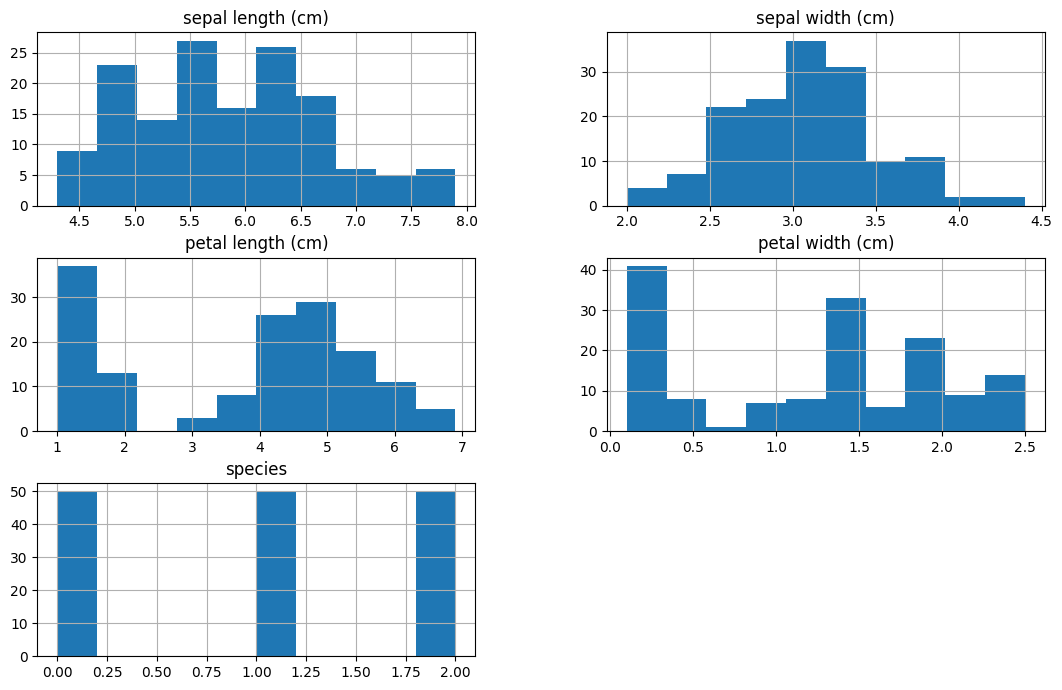

In [ ]:
# Analyze distribution of each feature
iris_data.hist(figsize=(13, 8))  # Create histograms for all features
plt.subplots_adjust(bottom=0.1)  # Adjust layout to avoid overlapping labels
plt.show()

From the above distribution plots, we can have an idea about hoe the features are distributed. Here we see that,

1. Sepal wigth has a normal distribution.
2. Sepal length also has a type of normal distribution.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The palette list has

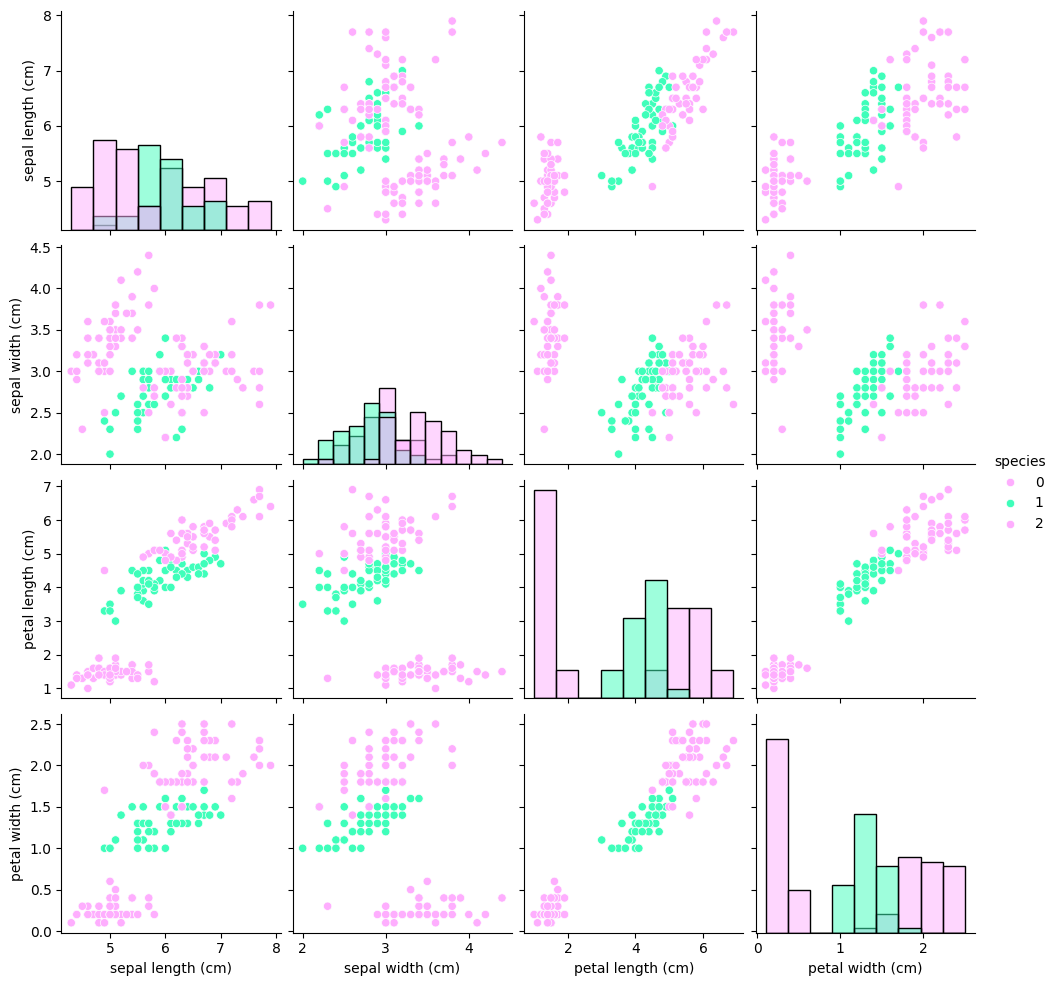

In [ ]:
# Analyze distribution of each feature by class (species)
mypal= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']
sns.pairplot(iris_data, hue="species", diag_kind="hist", palette=mypal[1::4])  # Pair plots with histograms on diagonals
plt.show()

From the pairplot, we see that most of the features are highly correlated. The same can be understood numerically using heatmaps as below.

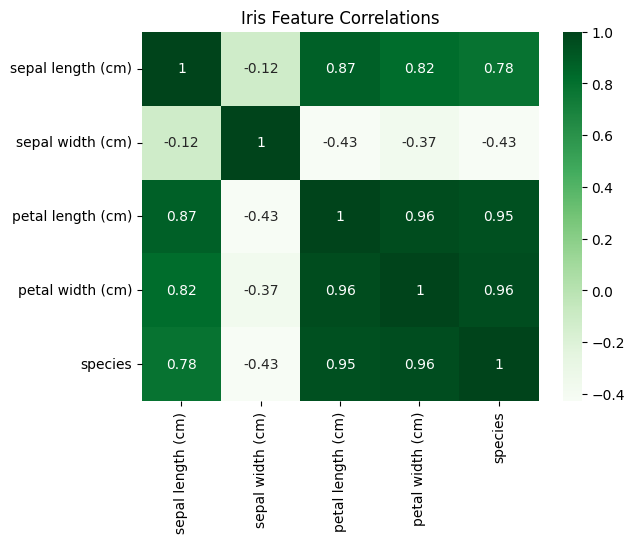

In [ ]:
# Correlation heatmap to see relationships between features
sns.heatmap(iris_data.corr(), cmap="Greens", annot=True)  # Create heatmap with correlation values
plt.title("Iris Feature Correlations")
plt.show()

From the above heatmaps we see that,

1. Petal length and petal width are highly correlated with a correlation of 0.96
2. Species and petal length has a high correlation of 0.95
3. Petal width and sepal leangth have a high correlation of 0.82 and
4. Species and sepal length have a high correlation of 0.78

Some of the features have a weak negative correlation which can be observed from the above heatmap.

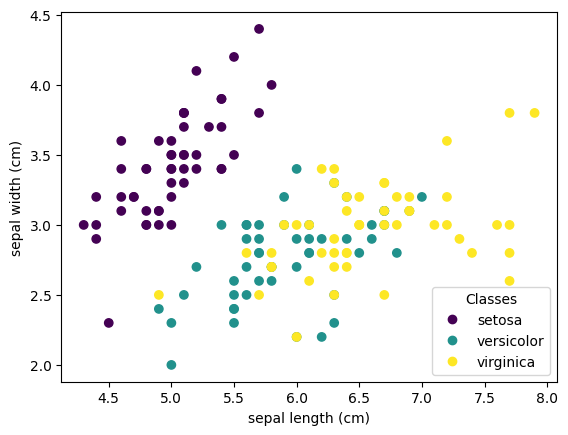

In [ ]:
# Scatter plot of sepal width and sepal length
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

The above scatter plot shows all three species association with sepal length on x-axis and sepal width on y-axis.

We see that setosa has a proper classification. The problem is with classification of versicolor and virginica.

Here boosting is used to check if this problem is solved by this gradient boosting technique.

In [ ]:
# Analyze target variable distribution
print(iris_data["species"].value_counts())  # Print class distribution

species
0    50
1    50
2    50
Name: count, dtype: int64


Here, we see that there are equal number of species which does not create an imbalance easing our model construction and analysis.

In [ ]:
# Explore data by species (optional)
for species in iris_data["species"].unique():
    species_data = iris_data[iris_data["species"] == species]
    print(f"\nDescription for {species}:")
    print(species_data.describe())  # Summary statistics for each species


Description for 0:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           50.00000         50.000000          50.000000   
mean             5.00600          3.428000           1.462000   
std              0.35249          0.379064           0.173664   
min              4.30000          2.300000           1.000000   
25%              4.80000          3.200000           1.400000   
50%              5.00000          3.400000           1.500000   
75%              5.20000          3.675000           1.575000   
max              5.80000          4.400000           1.900000   

       petal width (cm)  species  
count         50.000000     50.0  
mean           0.246000      0.0  
std            0.105386      0.0  
min            0.100000      0.0  
25%            0.200000      0.0  
50%            0.200000      0.0  
75%            0.300000      0.0  
max            0.600000      0.0  

Description for 1:
       sepal length (cm)  sepal width (cm)  petal length (c

The above table shows all the summary statistics for each species seperately.
Many observations can be made with the help of the above table.

### ***Model Building***

In [ ]:
# Segregation of features
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The data is split into training and testing sets for both classification and regression tasks.

We initialize a Decision Tree Classifier (DecisionTreeClassifier) for classification and a Decision Tree Regressor (DecisionTreeRegressor) for regression.

The models are trained using the training data.

Predictions are made on the test set for both tasks.

The performance of the classifier is evaluated using accuracy, and the performance of the regressor is evaluated using mean squared error.

In [ ]:
# Classification Tree
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_clf = clf.predict(X_test)

# Evaluate the classifier
accuracy_clf = accuracy_score(y_test, y_pred_clf)
print(f"Classification Accuracy: {accuracy_clf:.2f}")

# Display the classification tree
graph_clf = Source(export_graphviz(clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names,
                                    filled=True, rounded=True))
graph_clf.format = 'pdf'  # Set the format to PDF
graph_clf.render('classification_tree')  # Save as classification_tree.pdf

Classification Accuracy: 1.00


'classification_tree.pdf'

Here, we see the accuarcy of 100%. This situation is almost impossible in real life problems. It is a hypothetical situation.

In [ ]:
# Regression Tree
# Use petal length as the target for regression
y_reg = iris.data[:, 2]  # Using petal length as the target for regression

# Split the data into training and testing sets for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
reg = DecisionTreeRegressor()

# Train the regressor
reg.fit(X_train_reg, y_train_reg)

# Make predictions on the test set for regression
y_pred_reg = reg.predict(X_test_reg)

# Evaluate the regressor
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Regression Mean Squared Error: {mse_reg:.2f}")

# Display the regression tree
graph_reg = Source(export_graphviz(reg, out_file=None, feature_names=iris.feature_names,
                                    filled=True, rounded=True))
graph_reg.format = 'pdf'  # Set the format to PDF
graph_reg.render('regression_tree')  # Save as regression_tree.pdf

Regression Mean Squared Error: 0.00


'regression_tree.pdf'

Here, the regression mean squared error is zero, which shows overfitting.

In [ ]:
# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()

# Define the hyperparameters grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 5, 7]
}

# Perform Grid Search Cross Validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

We initialize a Gradient Boosting Classifier and define a grid of hyperparameters for tuning using Grid Search Cross Validation (GridSearchCV).

In [ ]:
# Train the model with the best hyperparameters
best_gb_classifier = GradientBoostingClassifier(**best_params)
best_gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_gb_classifier.predict(X_test)

The model is trained using the training data and the best hyperparameters are obtained from Grid Search CV.

Predictions are made on the test set, and the model's performance is evaluated using accuracy, classification report, and confusion matrix.

### ***Accuracy Measures***

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [ ]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## **Conclusion**

In this report, we explored the application of boosting techniques to enhance classification/regression trees, focusing on the Iris dataset as a case study. Through thorough exploratory data analysis, model building using Gradient Boosting, and hyperparameter tuning, we aimed to optimize the model's performance. The accuracy measures allowed us to quantify the model's predictive power and assess its effectiveness in classifying Iris flower species. This study demonstrates the potential of boosting algorithms in improving tree-based models for various machine learning tasks.